In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# Create your connection.
cnx = sqlite3.connect('E:\\Database\\database.sqlite')
cursor = cnx.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]


In [3]:
corr = df.corr() #checking correlation  little or no multicollinearity
corr.style.background_gradient(cmap='coolwarm')


,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1,0.00336772,0.00198702,-0.00287541,0.00121721,-0.0191486,-0.00788218,-0.0112955,-0.00613191,-0.00634312,-0.0138902,-0.0193094,-0.0076078,-0.00738183,-0.0129192,-0.00763326,-0.0111176,-0.000874305,-0.00424019,-0.0094455,-0.00972534,-0.00415984,-0.00981632,-0.00825109,-0.0100122,-0.0166501,-0.00773021,-0.0145412,-0.00773148,-0.0106205,-0.00955471,-0.0121961,-0.0106895,0.0139803,0.0104355,0.00864455,0.013563,0.0141518
player_fifa_api_id,0.00336772,1,0.55462,-0.274089,-0.0276192,-0.0641832,-0.0280096,-0.104655,-0.0642193,-0.0877435,0.0498217,-0.0513943,-0.108611,-0.112457,-0.0234962,0.17684,0.176643,0.117608,-0.226008,0.00766364,-0.0775786,-0.0726377,0.0120257,-0.177467,-0.0671546,-0.170696,-0.178182,-0.0862347,-0.164171,-0.182479,-0.0779792,-0.0732123,-0.0543213,-0.0917372,-0.143113,-0.267489,-0.145119,-0.135443
player_api_id,0.00198702,0.55462,1,-0.322389,0.0109909,-0.11062,-0.0603872,-0.129488,-0.0873197,-0.13014,0.018328,-0.0979135,-0.150856,-0.138361,-0.0512478,0.103051,0.0958657,0.0276306,-0.306165,0.0211066,-0.123198,-0.141016,-0.10882,-0.232937,-0.117087,-0.210959,-0.188561,-0.107012,-0.188077,-0.164783,-0.0899984,-0.0865957,-0.0728886,-0.0714946,-0.128573,-0.238898,-0.128707,-0.124961
overall_rating,-0.00287541,-0.274089,-0.322389,1,0.766757,0.357699,0.329298,0.314099,0.458361,0.36147,0.354324,0.357772,0.349592,0.435018,0.444257,0.245655,0.254841,0.239896,0.769246,0.160364,0.427996,0.259023,0.327456,0.318661,0.392382,0.323934,0.25037,0.370019,0.431137,0.393189,0.133377,0.165349,0.128889,0.0279755,0.00441021,0.025682,0.00570903,0.00568724
potential,0.00121721,-0.0276192,0.0109909,0.766757,1,0.277755,0.286684,0.207706,0.382605,0.301302,0.338675,0.296073,0.263358,0.343716,0.401368,0.338044,0.340054,0.29295,0.580235,0.201974,0.325697,0.174819,0.260509,0.126931,0.312808,0.164815,0.16573,0.327829,0.378901,0.316414,0.0557581,0.083822,0.0639755,-0.01125,0.0047424,0.0892047,0.00340623,0.0039619
crossing,-0.0191486,-0.0641832,-0.11062,0.357699,0.277755,1,0.57686,0.369747,0.79015,0.637891,0.809061,0.789132,0.707576,0.681959,0.807302,0.599012,0.579409,0.599248,0.384514,0.518518,0.65628,0.0213201,0.56436,-0.0702914,0.715925,0.323599,0.305952,0.682113,0.693227,0.571473,0.235159,0.285265,0.275467,-0.603898,-0.59561,-0.349559,-0.597625,-0.60158
finishing,-0.00788218,-0.0280096,-0.0603872,0.329298,0.286684,0.57686,1,0.373536,0.579365,0.851339,0.784659,0.691201,0.632248,0.337601,0.719709,0.528942,0.509506,0.554235,0.354473,0.394012,0.726982,0.00895283,0.346688,-0.0530479,0.806005,0.0437143,-0.149366,0.798441,0.651455,0.720388,-0.284603,-0.229699,-0.26089,-0.479162,-0.465099,-0.287681,-0.470673,-0.473173
heading_accuracy,-0.0112955,-0.104655,-0.129488,0.314099,0.207706,0.369747,0.373536,1,0.5487,0.391638,0.400494,0.32112,0.307587,0.358634,0.551049,0.200077,0.267273,0.0692198,0.295348,0.078953,0.540868,0.286803,0.477466,0.493051,0.406758,0.575705,0.452849,0.411554,0.337184,0.431336,0.461543,0.480624,0.441769,-0.665365,-0.647876,-0.39154,-0.647738,-0.651373
short_passing,-0.00613191,-0.0642193,-0.0873197,0.458361,0.382605,0.79015,0.579365,0.5487,1,0.640253,0.787994,0.732295,0.692461,0.797488,0.890042,0.503266,0.49138,0.510591,0.459289,0.461714,0.721767,0.0601464,0.609956,0.0920841,0.728791,0.453783,0.424288,0.677577,0.765336,0.609537,0.350171,0.415678,0.38099,-0.693313,-0.689528,-0.413317,-0.690702,-0.692926
volleys,-0.00634312,-0.0877435,-0.13014,0.36147,0.301302,0.637891,0.851339,0.391638,0.640253,1,0.784366,0.752248,0.682751,0.414123,0.749557,0.51325,0.49409,0.559756,0.397233,0.415812,0.746484,0.0232302,0.38264

In [ ]:
#dropping few columns like ids , date and categorical data

In [3]:
del_list = ["id", "player_fifa_api_id", "player_api_id" ,"date","preferred_foot","attacking_work_rate","defensive_work_rate"]
df = df.drop(del_list , axis = 1)

In [4]:
corr = df.corr() #checking correlation  little or no multicollinearity
corr.style.background_gradient(cmap='coolwarm')

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
overall_rating,1,0.766757,0.357699,0.329298,0.314099,0.458361,0.36147,0.354324,0.357772,0.349592,0.435018,0.444257,0.245655,0.254841,0.239896,0.769246,0.160364,0.427996,0.259023,0.327456,0.318661,0.392382,0.323934,0.25037,0.370019,0.431137,0.393189,0.133377,0.165349,0.128889,0.0279755,0.00441021,0.025682,0.00570903,0.00568724
potential,0.766757,1,0.277755,0.286684,0.207706,0.382605,0.301302,0.338675,0.296073,0.263358,0.343716,0.401368,0.338044,0.340054,0.29295,0.580235,0.201974,0.325697,0.174819,0.260509,0.126931,0.312808,0.164815,0.16573,0.327829,0.378901,0.316414,0.0557581,0.083822,0.0639755,-0.01125,0.0047424,0.0892047,0.00340623,0.0039619
crossing,0.357699,0.277755,1,0.57686,0.369747,0.79015,0.637891,0.809061,0.789132,0.707576,0.681959,0.807302,0.599012,0.579409,0.599248,0.384514,0.518518,0.65628,0.0213201,0.56436,-0.0702914,0.715925,0.323599,0.305952,0.682113,0.693227,0.571473,0.235159,0.285265,0.275467,-0.603898,-0.59561,-0.349559,-0.597625,-0.60158
finishing,0.329298,0.286684,0.57686,1,0.373536,0.579365,0.851339,0.784659,0.691201,0.632248,0.337601,0.719709,0.528942,0.509506,0.554235,0.354473,0.394012,0.726982,0.00895283,0.346688,-0.0530479,0.806005,0.0437143,-0.149366,0.798441,0.651455,0.720388,-0.284603,-0.229699,-0.26089,-0.479162,-0.465099,-0.287681,-0.470673,-0.473173
heading_accuracy,0.314099,0.207706,0.369747,0.373536,1,0.5487,0.391638,0.400494,0.32112,0.307587,0.358634,0.551049,0.200077,0.267273,0.0692198,0.295348,0.078953,0.540868,0.286803,0.477466,0.493051,0.406758,0.575705,0.452849,0.411554,0.337184,0.431336,0.461543,0.480624,0.441769,-0.665365,-0.647876,-0.39154,-0.647738,-0.651373
short_passing,0.458361,0.382605,0.79015,0.579365,0.5487,1,0.640253,0.787994,0.732295,0.692461,0.797488,0.890042,0.503266,0.49138,0.510591,0.459289,0.461714,0.721767,0.0601464,0.609956,0.0920841,0.728791,0.453783,0.424288,0.677577,0.765336,0.609537,0.350171,0.415678,0.38099,-0.693313,-0.689528,-0.413317,-0.690702,-0.692926
volleys,0.36147,0.301302,0.637891,0.851339,0.391638,0.640253,1,0.784366,0.752248,0.682751,0.414123,0.749557,0.51325,0.49409,0.559756,0.397233,0.415812,0.746484,0.0232302,0.382649,-0.0361078,0.814433,0.127922,-0.0376039,0.778337,0.689852,0.71183,-0.168972,-0.106926,-0.126398,-0.508823,-0.487015,-0.27903,-0.490968,-0.492979
dribbling,0.354324,0.338675,0.809061,0.784659,0.400494,0.787994,0.784366,1,0.810404,0.705863,0.574307,0.900768,0.698161,0.669503,0.703083,0.377661,0.546064,0.744135,0.00855906,0.525359,-0.111598,0.806329,0.20277,0.106738,0.793309,0.732742,0.657698,0.00412791,0.0669582,0.0460424,-0.652739,-0.650525,-0.427115,-0.65341,-0.65603
curve,0.357772,0.296073,0.789132,0.691201,0.32112,0.732295,0.752248,0.810404,1,0.797411,0.585693,0.798737,0.549363,0.516899,0.619253,0.39291,0.493112,0.694749,-0.016958,0.454334,-0.114361,0.783548,0.203647,0.136265,0.720219,0.726943,0.648502,0.0336817,0.0952097,0.0812145,-0.557165,-0.54576,-0.333487,-0.550659,-0.552295
free_kick_accuracy,0.349592,0.263358,0.707576,0.632248,0.307587,0.692461,0.682751,0.705863,0.797411,1,0.599103,0.719743,0.430791,0.394848,0.504998,0.3681,0.43041,0.68279,-0.0332631,0.416123,-0.0561842,0.772652,0.232429,0.178005,0.654151,0.69739,0.665831,0.0745059,0.134508,0.106969,-0.4988,-0.492137,-0.271076,-0.494807,-0.496332


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 35 columns):
overall_rating        183142 non-null float64
potential             183142 non-null float64
crossing              183142 non-null float64
finishing             183142 non-null float64
heading_accuracy      183142 non-null float64
short_passing         183142 non-null float64
volleys               181265 non-null float64
dribbling             183142 non-null float64
curve                 181265 non-null float64
free_kick_accuracy    183142 non-null float64
long_passing          183142 non-null float64
ball_control          183142 non-null float64
acceleration          183142 non-null float64
sprint_speed          183142 non-null float64
agility               181265 non-null float64
reactions             183142 non-null float64
balance               181265 non-null float64
shot_power            183142 non-null float64
jumping               181265 non-null float64
stamina        

In [ ]:
df = df.drop('overall_rating' , axis = 1)

C:\Users\thanusha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


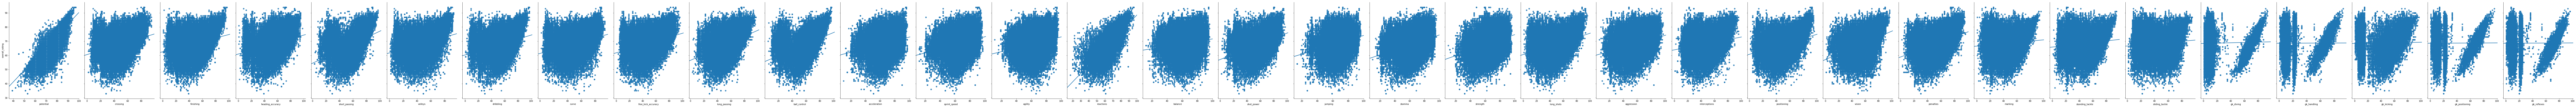

In [8]:
# visualize the relationship between the features and the response using scatterplots
import seaborn as sns
sns.pairplot(df, x_vars=['potential', 'crossing', 'finishing','heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve','free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration','sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes'], y_vars='overall_rating', height=7, aspect=0.7,kind = "reg")


In [ ]:
#building stats model

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
